Machine Learning Classification Notes
Table of Contents

Introduction to Linear Classifiers
Perceptron Algorithm
Adaptive Linear Neurons (Adaline)
Gradient Descent
Feature Scaling
Stochastic Gradient Descent
Mini-batch Gradient Descent
Code Implementation


1. Introduction to Linear Classifiers
Linear classifiers are fundamental algorithms in machine learning used for binary classification problems. They work by creating a linear decision boundary to separate different classes in the feature space.
Key points:

Originated from the McCulloch-Pitts (MCP) neuron model in 1943
Frank Rosenblatt published the perceptron learning rule in 1958
Linear classifiers are the building blocks for more complex neural networks

Learn more about the history of artificial neurons

2. Perceptron Algorithm
The Perceptron is one of the simplest types of artificial neural networks. It's a linear classifier that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.
Mathematical Representation:
$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b = \mathbf{w}^T\mathbf{x} + b$
$\sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \ 0 & \text{otherwise} \end{cases}$
Where:

$\mathbf{w}$ is the weight vector
$\mathbf{x}$ is the input feature vector
$b$ is the bias term (threshold)

Perceptron Learning Rule:
$w_i := w_i + \Delta w_i$
Where $\Delta w_i = \eta(y - \hat{y})x_i$, with $\eta$ being the learning rate, $y$ the true output, and $\hat{y}$ the predicted output.
Python Implementation:

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    

3. Adaptive Linear Neurons (Adaline)
Adaline (Adaptive Linear Neuron) is an improvement over the Perceptron, developed by Bernard Widrow and Tedd Hoff in 1960. It uses a linear activation function instead of a step function, allowing for more fine-grained weight updates.
Key differences from Perceptron:

Uses a linear activation function: $\sigma(z) = z$
Updates weights based on a continuous error function (usually Mean Squared Error)
Can handle non-linearly separable data better than Perceptron

Adaline Learning Rule (Widrow-Hoff rule):
$\Delta w_i = \eta(y - \sigma(z))x_i$
Where $\eta$ is the learning rate, $y$ is the true output, and $\sigma(z)$ is the predicted output.
Python Implementation:

In [2]:
import numpy as np

class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    

4. Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the loss function in machine learning models. It works by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.
Key Concepts:

Loss Function: Measures the difference between predicted and actual values. For Adaline, we typically use Mean Squared Error (MSE):
$L(\mathbf{w}, b) = \frac{1}{2n} \sum_{i=1}^n (y_i - \sigma(z_i))^2$
Gradient: The vector of partial derivatives of the loss function with respect to each parameter:
$\frac{\partial L}{\partial w_j} = -\frac{2}{n} \sum_i (y_i - \sigma(z_i))x_{ij}$
$\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_i (y_i - \sigma(z_i))$
Update Rule: Parameters are updated in the opposite direction of the gradient:
$\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}$
$b := b + \Delta b$
Where $\Delta\mathbf{w} = -\eta\nabla_w L(\mathbf{w}, b)$ and $\Delta b = -\eta\nabla_b L(\mathbf{w}, b)$

Python Implementation:

In [3]:
def gradient_descent(X, y, learning_rate, n_iterations):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for _ in range(n_iterations):
        z = np.dot(X, w) + b
        predictions = z  # linear activation
        
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b

5. Feature Scaling
Feature scaling is a technique used to standardize the range of independent variables or features of data. It's particularly important for algorithms that use gradient descent, as it helps them converge faster.
Standardization:
One common method of feature scaling is standardization, which transforms features to have zero mean and unit variance:
$x'_j = \frac{x_j - \mu_j}{\sigma_j}$
Where $\mu_j$ is the mean of feature $j$, and $\sigma_j$ is its standard deviation.
Python Implementation:

In [4]:
def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

6. Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a variation of gradient descent where the weights are updated for each training example, rather than after calculating the gradient for the entire dataset.
Key Points:

Faster than batch gradient descent for large datasets
More erratic path to convergence, but can help escape local minima
Useful for online learning scenarios

Update Rule:
For each training example $(x_i, y_i)$:
$\Delta w_j = \eta(y_i - \sigma(z_i))x_{ij}$
$\Delta b = \eta(y_i - \sigma(z_i))$

-Python Implementation:

In [5]:
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                loss = self._update_weights(xi, target)
                losses.append(loss)
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    

7. Mini-batch Gradient Descent
Mini-batch gradient descent is a compromise between batch gradient descent and stochastic gradient descent. It updates the parameters for mini-batches of training examples, rather than for the entire dataset (batch) or for each example (stochastic).
Key Points:

Reduces the variance of the parameter updates, leading to more stable convergence
Can make use of optimized matrix optimizations, unlike SGD
Typically results in better convergence than SGD or batch gradient descent

Update Rule:
For each mini-batch $B$ of size $m$:
$\Delta w_j = -\eta \frac{1}{m} \sum_{i \in B} (y_i - \sigma(z_i))x_{ij}$
$\Delta b = -\eta \frac{1}{m} \sum_{i \in B} (y_i - \sigma(z_i))$

In [6]:
def mini_batch_gradient_descent(X, y, batch_size, learning_rate, n_iterations):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for _ in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            z = np.dot(X_batch, w) + b
            predictions = z  # linear activation
            
            dw = (1/batch_size) * np.dot(X_batch.T, (predictions - y_batch))
            db = (1/batch_size) * np.sum(predictions - y_batch)
            
            w -= learning_rate * dw
            b -= learning_rate * db
    
    return w, b



8. Code Implementation and Visualization
In this section, we'll implement and compare the different algorithms we've discussed using the Iris dataset. We'll use the sepal length and petal length as features to classify Iris-setosa and Iris-versicolor. For each algorithm, we'll provide a visualization to help understand its behavior.
First, let's set up our environment and load the data:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:100, [0, 2]]  # sepal length and petal length
y = iris.target[:100]  # only two classes

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.RdYlBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')
        

8.1 Perceptron

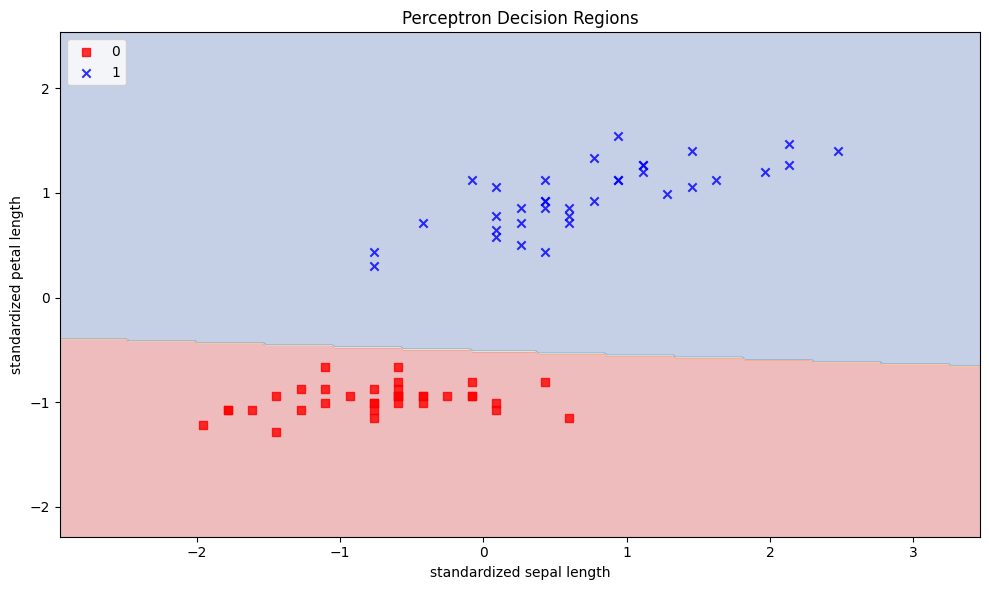

Misclassification errors: 0


In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plot_decision_regions(X_train_std, y_train, classifier=ppn)
plt.title('Perceptron Decision Regions')
plt.xlabel('standardized sepal length')
plt.ylabel('standardized petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassification errors: %d' % (y_test != ppn.predict(X_test_std)).sum())
#This will show the decision boundary created by 
# the Perceptron algorithm and print the number of
#  misclassification errors on the test set.



8.2 Adaline with Batch Gradient Descent

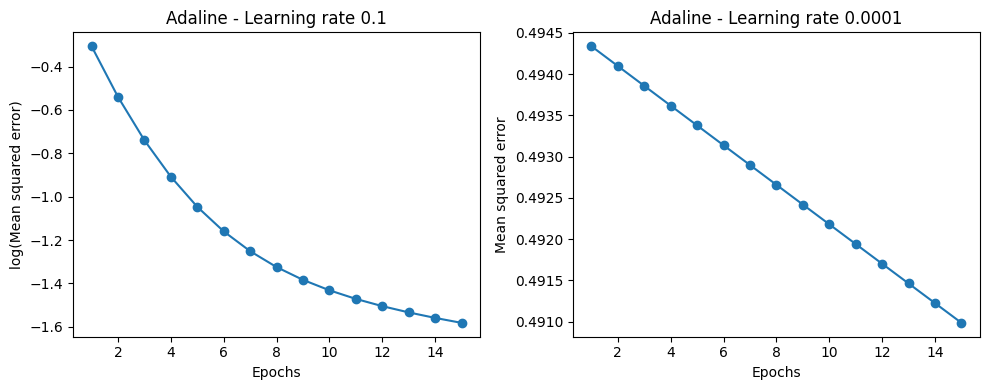

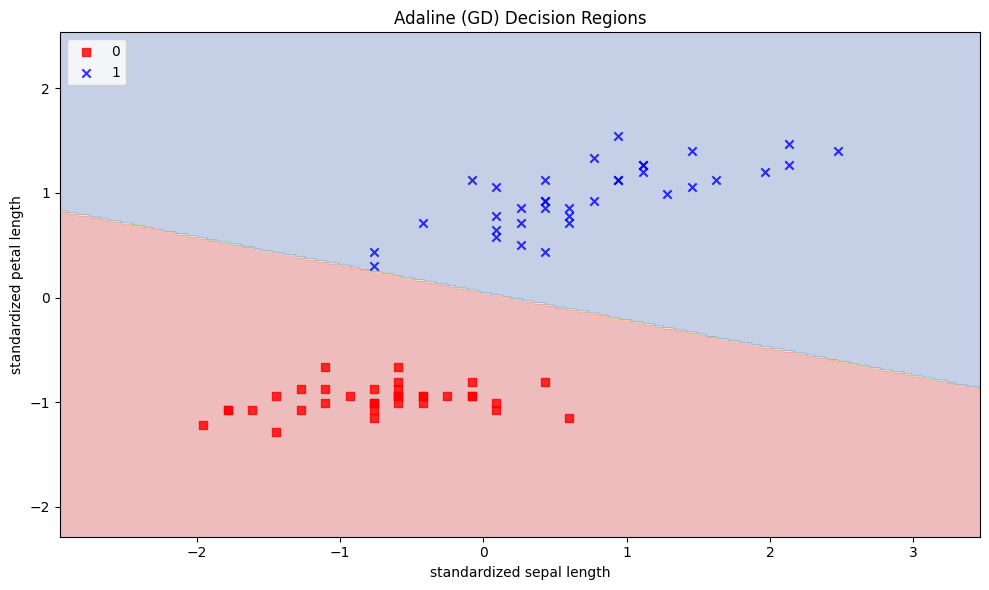

Misclassification errors: 1


In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(eta=0.1, n_iter=15).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(eta=0.0001, n_iter=15).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plot_decision_regions(X_train_std, y_train, classifier=ada1)
plt.title('Adaline (GD) Decision Regions')
plt.xlabel('standardized sepal length')
plt.ylabel('standardized petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassification errors: %d' % (y_test != ada1.predict(X_test_std)).sum())

#This will show the convergence of the cost 
# function for different learning rates and 
# the decision boundary created by the Adaline 
# algorithm with batch gradient descent.



8.3 Adaline with Stochastic Gradient Descent

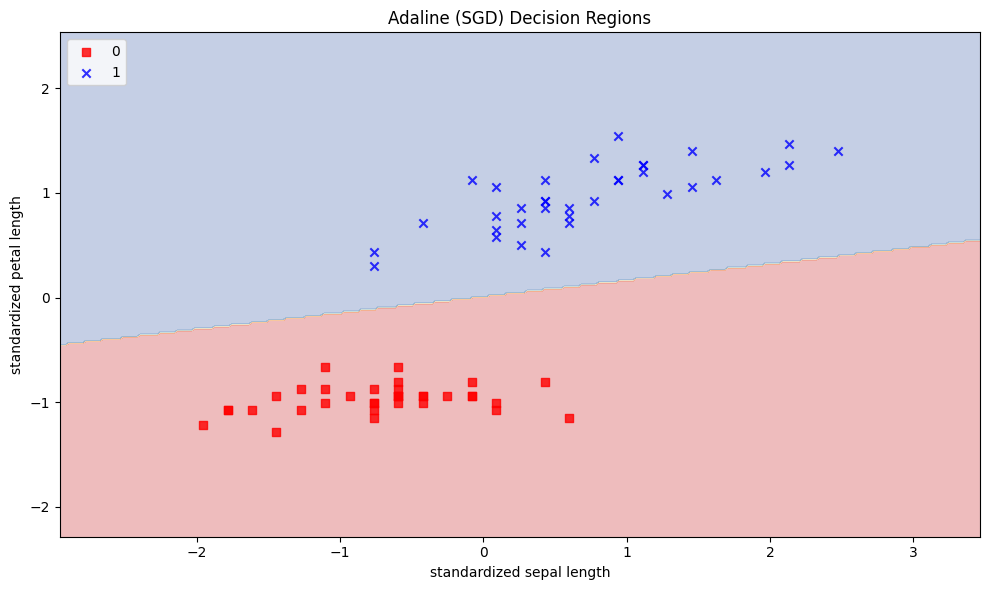

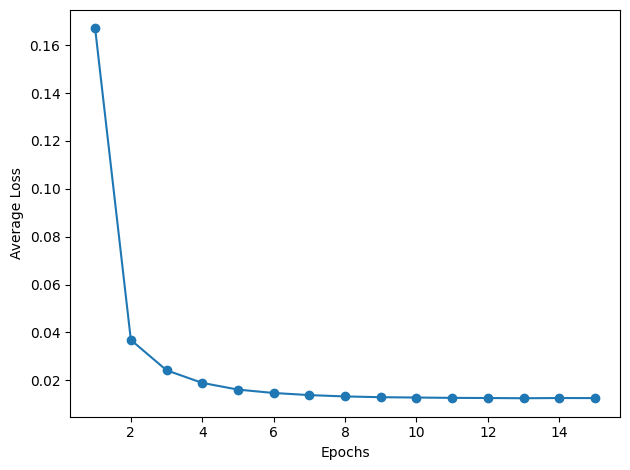

Misclassification errors: 0


In [10]:
ada_sgd = AdalineSGD(eta=0.01, n_iter=15, random_state=1)
ada_sgd.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plot_decision_regions(X_train_std, y_train, classifier=ada_sgd)
plt.title('Adaline (SGD) Decision Regions')
plt.xlabel('standardized sepal length')
plt.ylabel('standardized petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Loss')
plt.tight_layout()
plt.show()

print('Misclassification errors: %d' % (y_test != ada_sgd.predict(X_test_std)).sum())

#This will show the decision boundary created by
#  the Adaline algorithm with stochastic gradient 
# descent and the evolution of the average loss
#  over epochs.


8.4 Comparison of Algorithms
To compare the performance of all three algorithms, we can plot their decision regions side by side:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


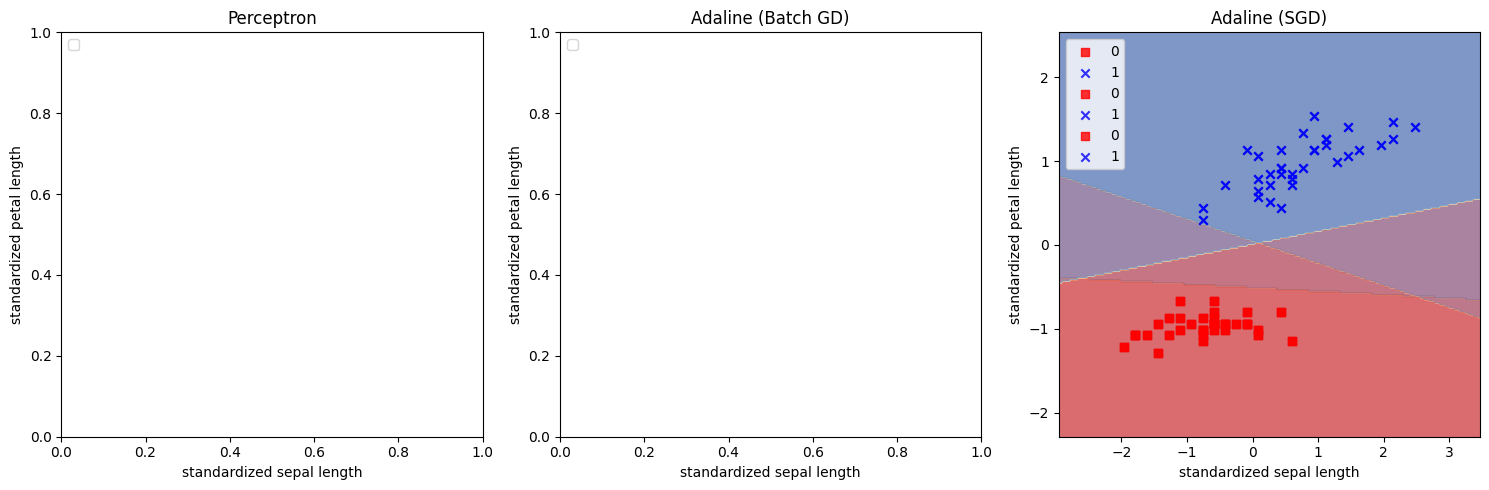

: 

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

classifiers = [ppn, ada1, ada_sgd]
titles = ['Perceptron', 'Adaline (Batch GD)', 'Adaline (SGD)']

for clf, title, axis in zip(classifiers, titles, ax.flatten()):
    plot_decision_regions(X_train_std, y_train, classifier=clf)
    axis.set_title(title)
    axis.set_xlabel('standardized sepal length')
    axis.set_ylabel('standardized petal length')
    axis.legend(loc='upper left')

plt.tight_layout()
plt.show()
